In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np 
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import GridSearchCV  
import matplotlib.pyplot as plt

In [2]:
with open('dataset.pickle', 'rb') as fp:
    dataset = pickle.load(fp)

In [3]:
print(dict.keys(dataset))

dict_keys(['x_subtrain', 'y_subtrain', 'x_valid', 'y_valid', 'x_stack', 'y_stack', 'x_test', 'y_test'])


In [4]:
print(dataset)

{'x_subtrain': array([[  2002., 162689.,      0., ...,      0.,      0.,      0.],
       [  2008., 158000.,      0., ...,      0.,      0.,      0.],
       [  2013.,  76020.,      0., ...,      0.,      0.,      0.],
       ...,
       [  2010., 102000.,      0., ...,      0.,      0.,      0.],
       [  2003., 219154.,      0., ...,      0.,      0.,      0.],
       [  2010.,  80667.,      0., ...,      0.,      0.,      0.]]), 'y_subtrain': array([ 8995, 13250,  7800, ...,  4650,  3950,  8499], dtype=int64), 'x_valid': array([[  2019.,  10868.,      0., ...,      0.,      0.,      0.],
       [  2004., 195649.,      0., ...,      0.,      0.,      0.],
       [  2011.,  62668.,      0., ...,      0.,      0.,      0.],
       ...,
       [  2007., 117000.,      0., ...,      0.,      0.,      0.],
       [  2010.,  85900.,      0., ...,      0.,      0.,      0.],
       [  2001., 252000.,      0., ...,      0.,      0.,      0.]]), 'y_valid': array([39995,  3799, 14990, ...,  49

In [4]:
x_subtrain = dataset["x_subtrain"]
y_subtrain = dataset['y_subtrain']
x_valid = dataset['x_valid']
y_valid = dataset['y_valid']
x_stack = dataset['x_stack']
y_stack = dataset['y_stack']
x_test = dataset['x_test']
y_test = dataset['y_test']

In [ ]:
#learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01]
#default n_est = 100, lr = 0.1

In [9]:
n_estimators = np.arange(500, 1250, 250)

rmse_list = []
mae_list = []

for n in n_estimators :
    gbr = GBR(n_estimators = n, learning_rate = 0.05, n_iter_no_change=3) 
    gbr.fit(x_subtrain, y_subtrain)
    y_pred = gbr.predict(x_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    rmse_list.append(rmse)
    mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
    mae_list.append(mae)
    s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.05, n, rmse, mae)
    print(s)

lr = 0.05, n_estimators = 500, rmse = 3595.3098888216764, mae = 2517.815039258221
lr = 0.05, n_estimators = 750, rmse = 3466.0274231210783, mae = 2419.751197787047
lr = 0.05, n_estimators = 1000, rmse = 3368.218736028517, mae = 2346.4609687316142


In [12]:
n_estimators = np.arange(500, 1250, 250)

for n in n_estimators :
    gbr = GBR(n_estimators = n, learning_rate = 0.1, n_iter_no_change=3) 
    gbr.fit(x_subtrain, y_subtrain)
    y_pred = gbr.predict(x_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    rmse_list.append(rmse)
    mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
    mae_list.append(mae)
    s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.1, n, rmse, mae)
    print(s)

lr = 0.1, n_estimators = 500, rmse = 3373.3347952964336, mae = 2342.2235496532753
lr = 0.1, n_estimators = 750, rmse = 3253.378677047967, mae = 2244.4479167275404
lr = 0.1, n_estimators = 1000, rmse = 3161.0857575273744, mae = 2172.557007402947


In [13]:
for n in n_estimators :
    gbr = GBR(n_estimators = n, learning_rate = 0.2, n_iter_no_change=3) 
    gbr.fit(x_subtrain, y_subtrain)
    y_pred = gbr.predict(x_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
    s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.2, n, rmse, mae)
    print(s)

lr = 0.2, n_estimators = 500, rmse = 3185.7336407907424, mae = 2179.294211778266
lr = 0.2, n_estimators = 750, rmse = 3150.6317263807423, mae = 2148.544258953148
lr = 0.2, n_estimators = 1000, rmse = 3262.1860286223714, mae = 2253.4695567654603


In [5]:
n = 750
gbr = GBR(n_estimators = n, learning_rate = 0.2, n_iter_no_change=3) 
gbr.fit(x_subtrain, y_subtrain)
y_pred = gbr.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.2, n, rmse, mae)
print(s)

lr = 0.2, n_estimators = 750, rmse = 3074.746402856346, mae = 2088.416713183923


In [6]:
with open('GBR_best.pickle', 'wb') as fp:
    pickle.dump(gbr, fp)

In [30]:
gbr = GBR(n_estimators = 250, learning_rate = 0.05, n_iter_no_change=3) 
gbr.fit(x_subtrain, y_subtrain)
y_pred = gbr.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.05, 250, rmse, mae)
print(s)

lr = 0.05, n_estimators = 250, rmse = 3865.088890852668, mae = 2721.6021258205215


In [25]:
gbr = GBR(n_estimators = 250, learning_rate = 0.1, n_iter_no_change=3) 
gbr.fit(x_subtrain, y_subtrain)
y_pred = gbr.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.1, 250, rmse, mae)
print(s)

lr = 0.1, n_estimators = 250, rmse = 3589.051750242173, mae = 2522.7866898890593


In [26]:
gbr = GBR(n_estimators = 250, learning_rate = 0.2, n_iter_no_change=3) 
gbr.fit(x_subtrain, y_subtrain)
y_pred = gbr.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.2, 250, rmse, mae)
print(s)

lr = 0.2, n_estimators = 250, rmse = 3361.2266535016506, mae = 2341.085399756433


In [27]:
gbr = GBR(n_estimators = 100, learning_rate = 0.2, n_iter_no_change=3) 
gbr.fit(x_subtrain, y_subtrain)
y_pred = gbr.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.2, 100, rmse, mae)
print(s)

lr = 0.2, n_estimators = 100, rmse = 3677.052728313228, mae = 2576.9149252807297


In [28]:
gbr = GBR(n_estimators = 100, learning_rate = 0.1, n_iter_no_change=3) 
gbr.fit(x_subtrain, y_subtrain)
y_pred = gbr.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.1, 100, rmse, mae)
print(s)

lr = 0.1, n_estimators = 100, rmse = 3962.012242231655, mae = 2798.954733213899


In [29]:
gbr = GBR(n_estimators = 100, learning_rate = 0.05, n_iter_no_change=3) 
gbr.fit(x_subtrain, y_subtrain)
y_pred = gbr.predict(x_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = np.sum(np.abs(y_valid - y_pred))/y_pred.size
s = "lr = {0}, n_estimators = {1}, rmse = {2}, mae = {3}".format(0.05, 100, rmse, mae)
print(s)

lr = 0.05, n_estimators = 100, rmse = 4270.8062359236355, mae = 3050.6893504281916


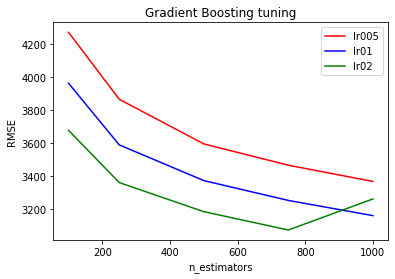

In [32]:
n_est = [100, 250, 500, 750, 1000]
rmse005 = [4270, 3865, 3595, 3466, 3368]
rmse01 = [3962, 3589, 3373, 3253, 3161]
rmse02 = [3677, 3361, 3185, 3074, 3262]

l1, = plt.plot(n_est, rmse005, color = "red")
l2, = plt.plot(n_est, rmse01, color = "blue")
l3, = plt.plot(n_est, rmse02, color = "green")

plt.title("Gradient Boosting tuning") # title
plt.ylabel("RMSE") # y label
plt.xlabel("n_estimators") # x label
plt.legend(labels = ['lr005', 'lr01', 'lr02'], loc = "best")

plt.savefig('rmse.jpg')
plt.show()


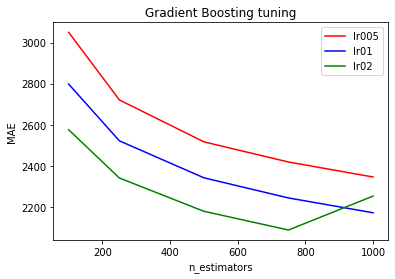

In [33]:
n_est = [100, 250, 500, 750, 1000]
mae005 = [3050, 2721, 2517, 2419, 2346]
mae01 = [2798, 2522, 2342, 2244, 2172]
mae02 = [2576, 2341, 2179, 2088, 2253]

l1, = plt.plot(n_est, mae005, color = "red")
l2, = plt.plot(n_est, mae01, color = "blue")
l3, = plt.plot(n_est, mae02, color = "green")

plt.title("Gradient Boosting tuning") # title
plt.ylabel("MAE") # y label
plt.xlabel("n_estimators") # x label
plt.legend(labels = ['lr005', 'lr01', 'lr02'], loc = "best")

plt.savefig('mae.jpg')
plt.show()